In [1]:
# %matplotlib inline
#加不加%matplotlib inline貌似现在没啥影响
import matplotlib.pyplot as plt
from scipy.misc import derivative#加载求导函数
import numpy as np

def 绘制标准坐标轴():
    import mpl_toolkits.axisartist as axisartist
    #创建画布
    fig = plt.figure(figsize=(8, 8))
    #使用axisartist.Subplot方法创建一个绘图区对象ax
    ax = axisartist.Subplot(fig, 111)  
    #将绘图区对象添加到画布中
    fig.add_axes(ax)

    #通过set_visible方法设置绘图区所有坐标轴隐藏
    ax.axis[:].set_visible(False)

    #ax.new_floating_axis代表添加新的坐标轴
    ax.axis["x"] = ax.new_floating_axis(0,0)

    #给x坐标轴加上箭头,"->"表示是空箭头，size = 0.5表示箭头大小
    ax.axis["x"].set_axisline_style("->", size = 0.5)

    #添加y坐标轴，且加上箭头,"-|>"则是实心箭头
    ax.axis["y"] = ax.new_floating_axis(1,0)
    ax.axis["y"].set_axisline_style("-|>", size = 0.5)

    #设置x、y轴上刻度显示方向
    ax.axis["x"].set_axis_direction("top")
    ax.axis["y"].set_axis_direction("right")

## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解B决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [2]:
import numpy as np
import random
随机数 = np.random.random((20, 2))
X = 随机数[:, 0]
Y= []
训练数据=[]

for x in X:
    y=x*7+ 3 + random.randint(-5, 5)
    Y.append(y)
    训练数据.append([x,y])



$ loss_{single}=(y-\hat y)^2=(y-kx-b)^2$

$ loss = \frac{1}{n} \sum{(y_i - kx_i - b)}^2 $

$ \frac{\partial{loss}}{\partial{k}} = \frac{2}{n}\sum(kx_i-y_i+b)x_i$

$ \frac{\partial{loss}}{\partial{b}} = \frac{2}{n}\sum(b+kx_i-y_i)=\frac{2}{n}\sum(kx_i-y_i+b)$

梯度为
$ (\frac{\partial{loss}}{\partial{k}},\frac{\partial{loss}}{\partial{b}})$

梯度的单位向量$ (\frac {\frac{\partial loss}{\partial k}}{\sqrt{(\frac{\partial loss}{\partial k})^2 + (\frac{\partial loss}{\partial b })^2}},\frac {\frac{\partial loss}{\partial b}}{\sqrt{(\frac{\partial loss}{\partial k})^2 + (\frac{\partial loss}{\partial b })^2}})$

令$ \frac{\partial{loss}}{\partial{k}}=dk,\frac{\partial{loss}}{\partial{b}}=db$



In [3]:
def 求损失函数梯度方向(k,b,训练数据):                                      #损失函数loss = \frac{1}{n} \sum{(y_i - kx_i - b_i)}^2 
    #损失函数梯度
    dk=0
    db=0
    #import math
    for 数据 in 训练数据:                                                  #数据=[x,y]
        x_i=数据[0]
        y_i=数据[1]
        dk += x_i*(k*x_i-y_i+b)
        db += (k*x_i-y_i+b)
        #print(dk,db)
    dk=2/len(训练数据)*dk
    db=2/len(训练数据)*db
    #单位向量=[dk/math.sqrt(dk*dk+db*db),db/math.sqrt(dk*dk+db*db)]       #使用单位向量，如果初始误差太大，步进太慢，直接使用梯度向量可以快速逼近
    return [dk,db]

In [4]:
def 线性回归(训练数据,步长,迭代次数):
    import random
    k = random.random() * 200 - 100  # -100 100
    b = random.random() * 200 - 100  # -100 100
    for i in range(迭代次数):
        方向=求损失函数梯度方向(k,b,训练数据)
        k=k+方向[0]*步长*(-1)                            #梯度下降，沿梯度反方向迭代，故乘以-1
        b=b+方向[1]*步长*(-1)
    return (k,b)

In [5]:
kb=线性回归(训练数据,步长=0.1,迭代次数=4000) #步长越短，需要迭代的次数越多。步长越长，越容易震荡，不容易得出结果。如何选取合适的步长呢？
print("k=",kb[0],"b=",kb[1])

k= 3.9618204823708307 b= 3.1877440353867876


In [6]:
def f(x):
    return kb[0]*x+kb[1]
f(54)

217.12605008341166

In [7]:
from sklearn.linear_model import LinearRegression #加载sklearn的LinearRegression模块

In [8]:
reg = LinearRegression().fit(X.reshape(-1, 1), Y)
print("k=",reg.coef_,"b=",reg.intercept_)                    #用LinearRegression拟合k和b与自己写的线性回归函数做个对比。

k= [3.96182048] b= 3.1877440353867943


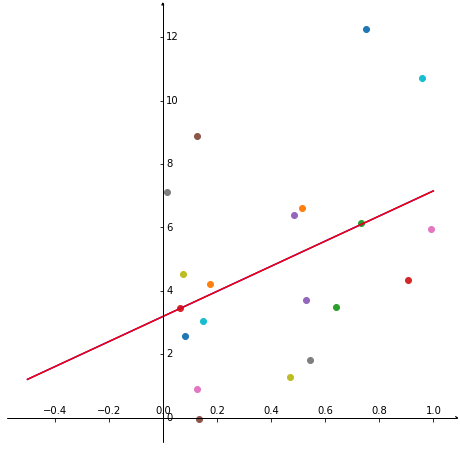

In [9]:
x=np.arange(-0.5,1,0.0001)
g=reg.coef_*x+reg.intercept_         #LinearRegression拟合出来的直线，红色
h=kb[0]*x+kb[1]                      #自己写的线性回归函数拟合出来的直线，蓝色
绘制标准坐标轴()
for 数据 in 训练数据:
    plt.scatter(数据[0],数据[1])
plt.plot(x,h,color='blue')
plt.plot(x,g,color='red')           #红色线后绘制，两个拟合直线高度重合时，红色会盖住蓝色

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [10]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in 训练数据]

In [11]:
from scipy.spatial.distance import cosine
def distance(x1, x2):
    return abs(x1-x2)#cosine(x1, x2)                                 #两点距离等于向量夹角的cos值？？？

In [12]:
def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    # 已经获得了最相似的数据集
    counter=0
    for xi in most_similars:
        counter += xi[1]
    most_common=counter/k
    return most_common
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了 
    # 非数字，先数数，选出现最多的特性

In [13]:
f(0.5)

5.168654276572203

In [14]:
predict(0.5,5)

3.96082331900129

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

信息熵$$  Entropy= - \sum_i^n Pr(x_i)log(Pr(x_i)) $$

In [15]:
def 求信息熵(群体):#群体的混乱程度,值越大，越混乱;群体是列表 ，如：[A,B,A,A,C,D,D,F,E]
    信息熵=0
    for 个体 in 群体:
        个体出现概率=群体.count(个体)/len(群体)
        信息熵 +=-个体出现概率*np.log(个体出现概率)
    return 信息熵

In [16]:
求信息熵([1,1,1,0])

0.9938582532964797

In [17]:
mock_data = {
    '性别':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    '收入': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    '家庭成员数': [1, 1, 2, 1, 1, 1, 2],
    '是否购买': [1, 1, 1, 0, 0, 0, 1],
}

In [18]:
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,性别,收入,家庭成员数,是否购买
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [19]:
#mock_data = {
#    '性别':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
#    '收入': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
#    '家庭成员数': [1, 1, 2, 1, 1, 1, 2],
#    '是否购买': [1, 1, 1, 0, 0, 0, 1],
#}
def 求分割特征项(数据表,目标):#dataset[dataset["family_number"]==1]['bought'].tolist
    最佳特征项列表=[]
    while 1==1:
        特征行 = set(数据表.columns.tolist()) - {目标} # set()-sett(),list之间没有减法。如果用list的话，后面循环时遇到目标可以跳出
        特征行信息熵=[]
        for 特征 in 特征行:                            # 特征行为列表，比如内容为[性别,收入,家庭成员数]；特征为里面的具体项，比如家庭成员
            特征总信息熵=0
            最小特征值信息熵=float('inf')               #float('inf')为无穷大
            for 特征值 in set(数据表[特征]):            # 获取特征值，比如家庭成员为2的2
                特征值对应目标值列表=list(数据表[数据表[特征]==特征值][目标])#获取该特征值下对应的所有目标值，并组织一个列表，然后求信息熵
                特征值信息熵=求信息熵(特征值对应目标值列表)
                if 特征值信息熵<=最小特征值信息熵:                           # 如果信息熵小于最小信息熵则，最小信息熵变成新求出来的这个信息熵
                    信息熵最小特征值=特征值                                  # 并记录下来对应的特征值
                    最小特征值信息熵=特征值信息熵
                    目标值=round(sum(特征值对应目标值列表)/len(特征值对应目标值列表))
                特征总信息熵 +=特征值信息熵                                  # 累加获得该特征项下所有信息熵的和
            特征行信息熵.append([特征总信息熵,特征,信息熵最小特征值,目标值])

        最佳特征项=min(特征行信息熵)
        for 特征项 in 最佳特征项列表:
            if 最佳特征项[1]==特征项[0]:return 最佳特征项列表
        最佳特征项列表.append([最佳特征项[1],最佳特征项[2],最佳特征项[3]])
        数据表=数据表[数据表[最佳特征项[1]]!=最佳特征项[2]]

In [20]:
特征项分割=求分割特征项(dataset,"是否购买")
print(特征项分割)

[['家庭成员数', 2, 1], ['性别', 'M', 0], ['收入', '-10', 1]]


In [21]:
dataset1=dataset[dataset["家庭成员数"]!=2]
dataset2=dataset1[dataset1["性别"]!="M"]
dataset3=dataset2[dataset2["收入"]!="-10"]


In [22]:
dataset1

,性别,收入,家庭成员数,是否购买
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [23]:
dataset2

,性别,收入,家庭成员数,是否购买
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0


In [24]:
dataset3

,性别,收入,家庭成员数,是否购买
0,F,+10,1,1
3,F,+10,1,0


两口子肯定买，单身男性肯定不买，单身女性可能买，缺钱的单身女性必然会买。
这大概是一种家庭需要，男士不会用或用不到，女性用的到但有钱不买这个东西，也能通过其他消费享受到服务，但是没钱只能买了自己给自己服务的一些东西

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [25]:
from sklearn.cluster import KMeans

In [26]:
X = [random.randint(0, 100) for _ in range(100)]
Y = [random.randint(0, 100) for _ in range(100)]
tranning_data = [[x, y] for x, y in zip(X, Y)]


In [27]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [28]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
cluster.cluster_centers_

array([[89.5       , 69.58333333],
       [42.52941176, 49.35294118],
       [76.65      , 22.6       ],
       [13.04347826, 75.08695652],
       [26.92857143, 23.64285714],
       [54.64285714, 85.57142857]])

In [30]:
from collections import defaultdict

In [31]:
centers = defaultdict(list)

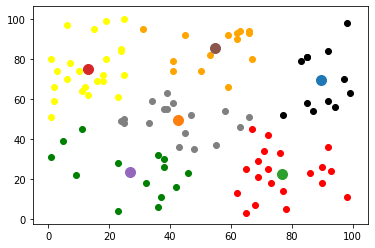

In [32]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
    color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型是在现实中的某个对象的基础上选择我们重点关心特征、参数建立的，用来表示这个对象的东西。他是错的，因为他不能完全代表这个对象，否则模型就是这个对象的克隆体了，会带有太多我们不需要的东西。模型是有用的，是因为建模本身就是基于现实的，在某些方面或者特定条件下，与现实中的那个对象有着相同或者相似的特性，用他来做实验，可以推断现实中的那个对象可能发生的变化。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

过拟合：训练出来的模型，在训练数据上表现效果好，在测试数据上表现效果差。产生原因：1、训练数据太少，训练数据不太具有代表性，训练数据的分布不能覆盖全部数据的分布范围；2、模型过于复杂，把训练数据中不具有代表性的、有误差的数据都“完美”拟合了。

欠拟合：训练出来的模型，在训练数据上和测试数据上表现效果都很差。产生原因：模型太简单，或者迭代次数太少，没有地捕捉到数据特征

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

precision:精确率,表示在所有判断为阳性的样本里面，判断正确的比例,P

recall:召回率，表示在所有真正为阳性的样本里面，判断正确的比例,R

AUC：AUC为ROC曲线下的面积

F1:精确率和召回率的调和均值$\frac {2PR}{P+R}$

F2score：精确率和召回率的调和均值,F-score=$(1+ \beta^2)\frac {PR}{\beta^2P+R}$,F2core=$\frac {5PR}{4P+R}$,偏重与召回率

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

传统的分析式编程：需要人工分析问题来提出解决方案，然后通过编程来实现解决方案。
特点就是：1、输入的是数据，输出的数据；2、需要人工分析并编程；3、结果对特定问题解决比较好，一旦问题出现新的变化，需要重新编程。

机器学习：机器通过处理大量数据，寻求数据间的关系，并建立一个可以预测新数据的模型，以此解决某些问题。
特点就是：1、输出的是数据，输出的是程序；2、少量的人工分析甚至不需要人工分析；3、问题出现新的变化，不需要重新编程，机器自己重新学习一下就行了。


<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans:有正确的评价标准才能给出正确的反馈，推进机器学习模型往正确道路上前进，否则越跑越偏呀。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [33]:
def predicate(分割特征项集,参数集):         #分割特征项是一个列表，[[特征项1，特征值1，目标值1],[特征项2，特征值2，目标值2],...]
                                         #参数集是一个列表，[[gender,"F"]，[income,"-10"],[family_number,2]
    for 特征项 in 分割特征项集:          #特征项是[特征项，特征值，目标值]
        for  参数 in 参数集:
            if 参数[0]!=特征项[0]:continue
            if 参数[1]==特征项[1]:return print('bought:',特征项[2])
    return print("bought:1 or 0")

In [34]:
predicate(特征项分割,[["性别","M"],["收入","-10"],["家庭成员数",1]])

bought: 0


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

$ loss_{single}=|y-\hat y|=|y-kx-b|$

$ loss_{single}=\begin{cases}y-kx-b, y>kx+b \\kx+b-y, y≤kx+b\end{cases}$


$ loss = \frac{1}{n} \sum{|y_i-kx_i-b|} $

令$f_i=|y_i-kx_i-b|$

$f_i=\begin{cases}y_i-kx_i-b, y_i>kx_i+b \\kx_i+b-y_i, y_i≤kx_i+b\end{cases}$

$ \frac {\partial f_i}{\partial k}=\begin{cases}-x_i, y_i>kx_i+b \\x_i, y_i≤kx_i+b\end{cases}$

$ \frac {\partial f_i}{\partial b}=\begin{cases}-1, y_i>kx_i+b \\1, y_i≤kx_i+b\end{cases}$

$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n} \sum{\frac {\partial f_i}{\partial k}}$

$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n} \sum{\frac {\partial f_i}{\partial b}}$

梯度为
$ (\frac{\partial{loss}}{\partial{k}},\frac{\partial{loss}}{\partial{b}})$

令$ \frac{\partial{loss}}{\partial{k}}=dk,\frac{\partial{loss}}{\partial{b}}=db$


In [35]:
def 求损失函数梯度方向(k,b,训练数据):                                      #损失函数loss = |y-\hat y| 
    #损失函数梯度
    dk=0
    db=0
    #import math
    for 数据 in 训练数据:                                                  #数据=[x,y]
        x_i=数据[0]
        y_i=数据[1]
        if y_i > k*x_i+b:n=-1
        else:n=1
        dk += n*x_i
        db += n
        #print(dk,db)
    dk=1/len(训练数据)*dk
    db=1/len(训练数据)*db
    #单位向量=[dk/math.sqrt(dk*dk+db*db),db/math.sqrt(dk*dk+db*db)]       #使用单位向量，如果初始误差太大，步进太慢，直接使用梯度向量可以快速逼近
    return [dk,db]

In [36]:
kb=线性回归(训练数据,步长=0.1,迭代次数=10000) #步长越短，需要迭代的次数越多。步长越长，越容易震荡，不容易得出结果。如何选取合适的步长呢？
print("k=",kb[0],"b=",kb[1])

k= 2.691609220424775 b= 3.284394387040134


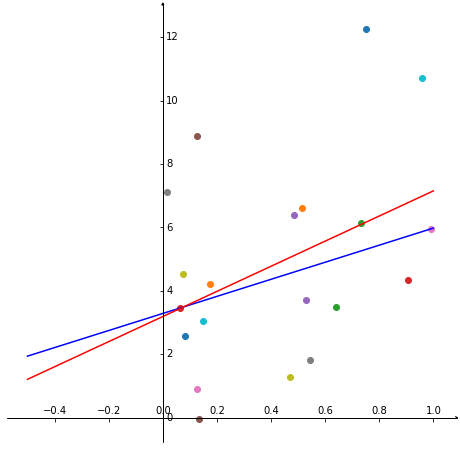

In [37]:
x=np.arange(-0.5,1,0.0001)
g=reg.coef_*x+reg.intercept_         #LinearRegression拟合出来的直线，红色
h=kb[0]*x+kb[1]                      #自己写的线性回归函数拟合出来的直线，蓝色
绘制标准坐标轴()
for 数据 in 训练数据:
    plt.scatter(数据[0],数据[1])
plt.plot(x,h,color='blue')
plt.plot(x,g,color='red')           #红色线后绘制，两个拟合直线高度重合时，红色会盖住蓝色

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)